In [31]:
import numpy as np
import random
import pandas as pd
#!pip install lifelines
import lifelines
from lifelines import CoxPHFitter
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats


In [16]:
import numpy as np
# Creating Dummy Data.
# time_ls - Time since last service.
time_ls = np.arange(1, 12)

# service_flg - Service required 1 - Yes, 0 - No.
service_flg = [1, 0]

# subscriber - Number of subscriber pinging the base station.
subscriber = [10, 15, 20, 25, 30]

# region - 1 - City, 0 - Remote Station (Mountains, Remote Locations).
region = [1, 0]


In [17]:
def get_dummy_data(dataframe,
                   column,
                   vector,
                   size):
    data = [random.choice(vector)for ele in range(size)]
    dataframe[column] = data
    return dataframe

In [18]:
vector_arr = [time_ls, subscriber, region, service_flg]
size = 1000
columns_arr = ["Time_Since_Service", "Subscribers", "Region", "Service_Flag"]

dataframe = pd.DataFrame()

for idx, ele in enumerate(vector_arr):
    dataframe = get_dummy_data(dataframe, columns_arr[idx], ele, size=size)


In [19]:
dataframe.head()

,Time_Since_Service,Subscribers,Region,Service_Flag
0,2,10,1,1
1,8,20,1,0
2,3,25,1,1
3,7,25,0,0
4,4,10,0,0


In [20]:
def cox_hazard_mdl(cox_mdl_object,dataframe, event, series):
    
    # Cox Proportional Hazards model.
    # Instantiate the class and create a model object.
   
    # Fit the training data.
    cox_mdl_object.fit(dataframe, series, event_col=event)
    
    # Model summary.
    cox_mdl_object.print_summary()
    
    return cox_mdl_object

In [21]:

event = "Service_Flag"
series = "Time_Since_Service"
cx_mdl = CoxPHFitter()
model = cox_hazard_mdl(cx_mdl,
                       dataframe,
                       event,
                       series)

<lifelines.CoxPHFitter: fitted with 1000 total observations, 485 right-censored observations>
             duration col = 'Time_Since_Service'
                event col = 'Service_Flag'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 515
   partial log-likelihood = -3109.83
         time fit was run = 2021-05-18 22:21:45 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
Subscribers  -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
Region       -0.09       0.92       0.09            -0.26             0.09                 0.77                 1.09

                z    p   -log2(p)
covariate                        
Subscribers -0.74 0.46       1.12
Region      -0.99 0.32       1.63
---
Concordance = 0.52
Partial AIC = 6223.67
log-likelihood ratio test = 1.45 on 2 df
-log2(p) of ll-ratio test = 1.05

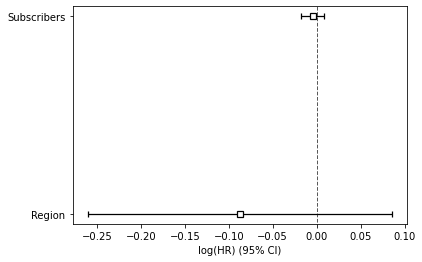

In [22]:
model.plot()

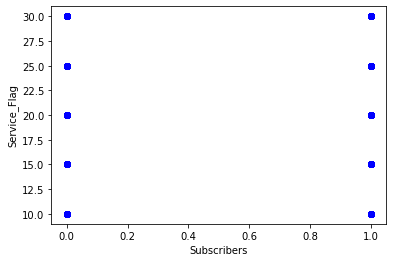

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dataframe.Service_Flag,  dataframe.Subscribers, color='blue')
plt.xlabel("Subscribers")
plt.ylabel("Service_Flag")
plt.show()

## Kaggle Competition 

https://www.kaggle.com/loganalive/echocardiogram-uci



In [25]:
# data_sample_df = pd.read_excel(open('Data Sample.xlsx','rb'),
#                                sheet_name = "TimeSeries")

data_sample_df = pd.read_csv("echocardiogram.csv")


def split_and_multiply(X):
    
    number = int(X.split(" ")[0])
    scale = X.split(" ")[1]
    #print("The number is {} and scale is {}".format(number,scale))
    
    if(scale == "Mn"):
        y = number*10e6
    
    return y
    
data_sample_df.head()
# split_and_multiply("10 Mn")
# data_sample_df['SNO'] = data_sample_df["Subscriber Number"].apply(lambda x : split_and_multiply(x))
# data_sample_df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [26]:
#Label encode region 
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()


data_sample_df.describe()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1
count,130.000000,131.000000,126.000000,132.000000,124.000000,117.000000,121.000000,128.000000,130.00000,129.000000,75.000000
mean,22.182923,0.328244,62.813722,0.765152,0.216734,12.164769,4.763157,14.438125,1.37800,0.786202,0.346667
std,15.858267,0.471377,8.342110,6.697225,0.107513,7.370159,0.810013,5.018566,0.45185,0.225661,0.506534
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.786000,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,0.857000,1.000000
max,57.000000,1.000000,86.000000,77.000000,0.610000,40.000000,6.780000,39.000000,3.00000,2.000000,2.000000


In [28]:
#Look for null values 
print(data_sample_df.isnull().sum())

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64


# Impute missing values with mean

In [32]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
COLUMNS = ['age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score']
X = imp_mean.fit_transform(data_sample_df[COLUMNS])
df_X = pd.DataFrame(X,
                    columns = COLUMNS)
df_X.shape

(133, 6)

In [34]:
COLUMNS_keep = ['survival', 'alive']
df_keep = data_sample_df[COLUMNS_keep]
df_keep.shape

(133, 2)

In [35]:
df = pd.concat([df_keep, df_X], axis = 1)
df = df.dropna() 
print(df.isnull().sum())
print(df.shape)

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
dtype: int64
(130, 8)


# Scatter plots between survival and covariates

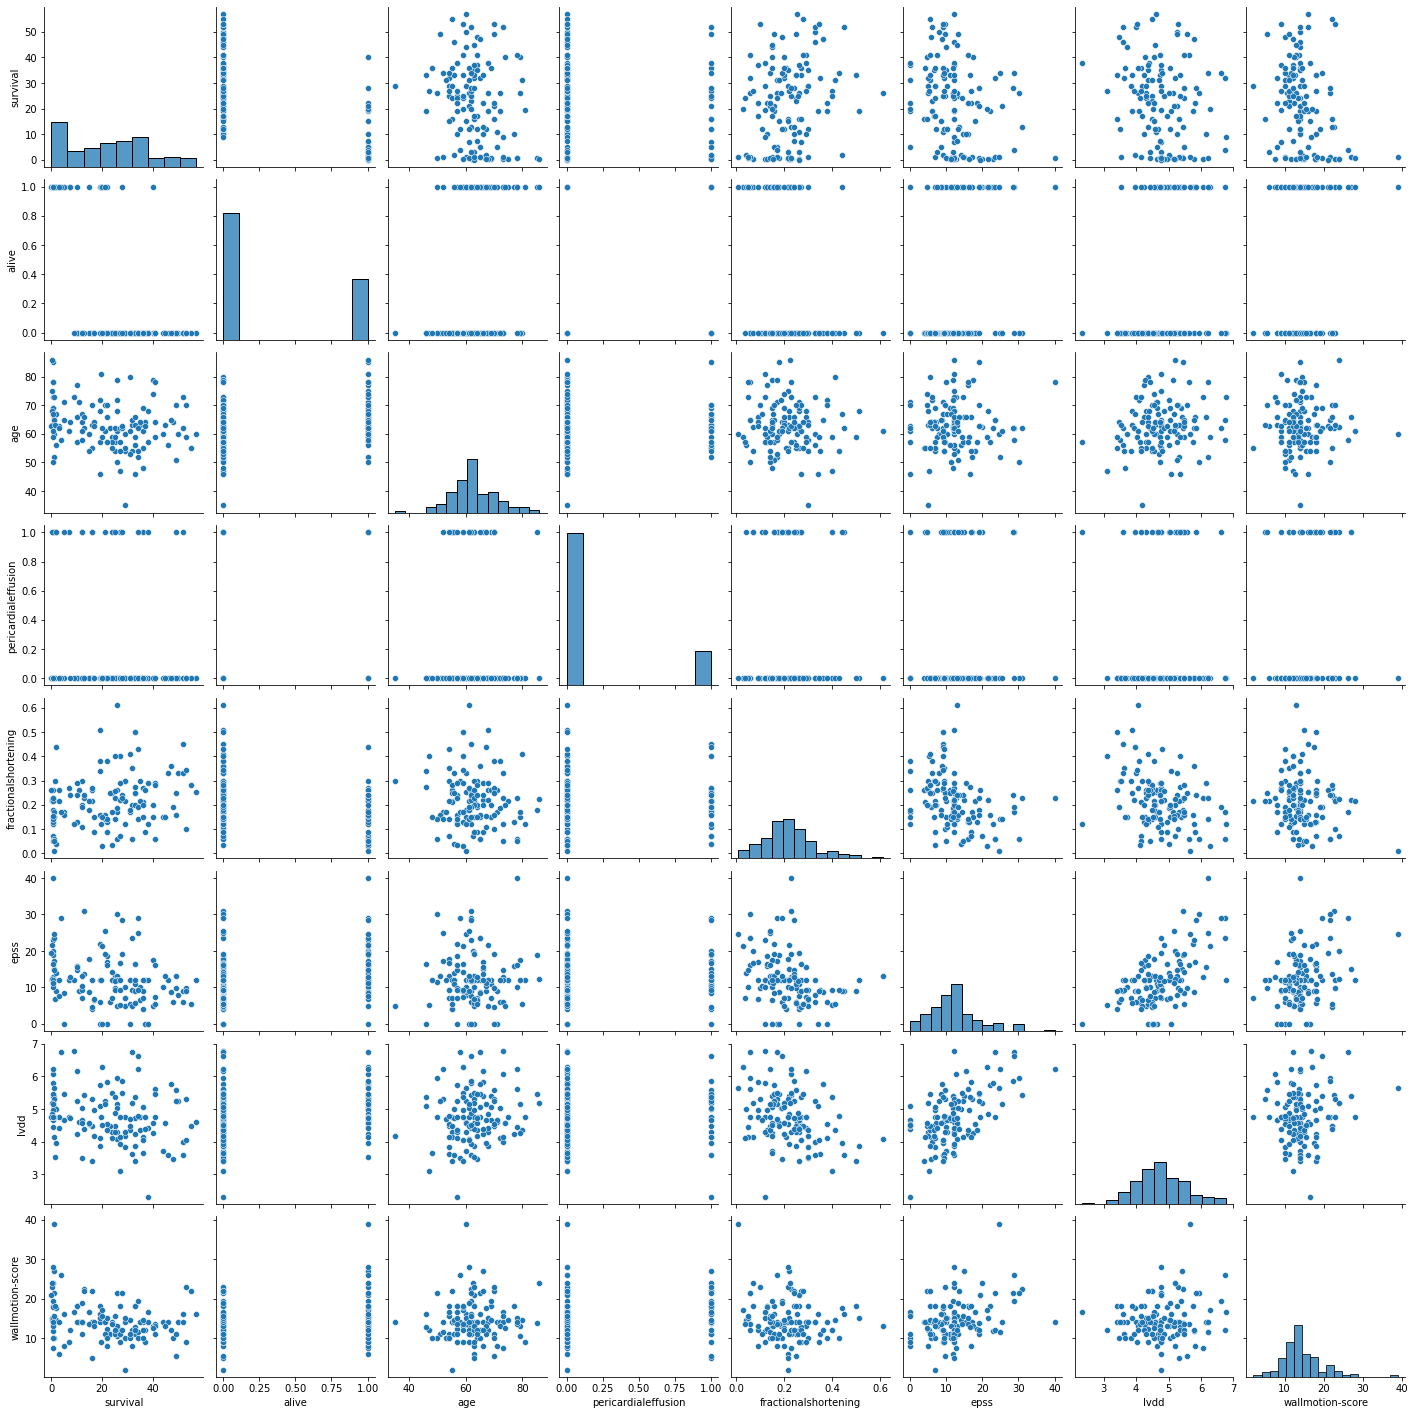

In [36]:
sns.pairplot(df)

# Check censored data
For alive = 1 patients, because they are alive during data collection period and we do not know their survival months after the data collection, they are regarded as censored data. Hence, the following analysis needs to consider the censored data by making dead variable below.

In [37]:
df.loc[df.alive == 1, 'dead'] = 0
df.loc[df.alive == 0, 'dead'] = 1
df.groupby('dead').count()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score
dead,,,,,,,,
0.0,42,42,42,42,42,42,42,42
1.0,88,88,88,88,88,88,88,88


In [38]:
# We have 88 non-censored data and 42 censored data.

In [53]:
#df.drop(columns = ['alive'],inplace=True)
df.head()

,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,dead
0,11.0,71.0,0.0,0.260,9.000,4.600,14.0,1.0
1,19.0,72.0,0.0,0.380,6.000,4.100,14.0,1.0
2,16.0,55.0,0.0,0.260,4.000,3.420,14.0,1.0
3,57.0,60.0,0.0,0.253,12.062,4.603,16.0,1.0
4,19.0,57.0,0.0,0.160,22.000,5.750,18.0,0.0


# Model 1 : Using l1_ratio = 1 without Statifying 

https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html

In [61]:
# In how many months we need for the next Service 

event = "dead"
series = "survival"
cx_mdl_lasso = CoxPHFitter(l1_ratio = 1,penalizer = 1.0)
base_lasso_model = cox_hazard_mdl(cx_mdl_lasso,
                            df,
                       event,
                       series)


<lifelines.CoxPHFitter: fitted with 130 total observations, 42 right-censored observations>
             duration col = 'survival'
                event col = 'dead'
                penalizer = 1.0
                 l1 ratio = 1
      baseline estimation = breslow
   number of observations = 130
number of events observed = 88
   partial log-likelihood = -312.80
         time fit was run = 2021-05-19 22:46:39 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
age                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
pericardialeffusion    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
fractionalshortening  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
epss                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
lvdd                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wallmotion-score      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                         z    p   -log2(p)
covariate                                 
age                  -0.00 1.00       0.00
pericardialeffusion   0.00 1.00       0.00
fractionalshortening -0.00 1.00       0.00
epss                  0.00 1.00       0.00
lvdd                  0.00 1.00       0.00
wallmotion-score     -0.00 1.00       0.00
---
Concordance = 0.54
Partial AIC = 637.60
log-likelihood ratio test = -0.00 on 6 df
-log2(p) of ll-ratio test = -0.00

Concordance Index
Another censoring-sensitive measure is the concordance-index, also known as the c-index. This measure evaluates the accuracy of the ranking of predicted time. It is in fact a generalization of AUC, another common loss function, and is interpreted similarly:

0.5 is the expected result from random predictions,

1.0 is perfect concordance and,

0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

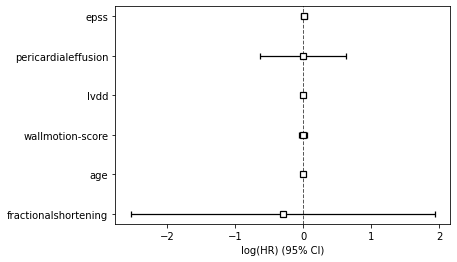

In [51]:
base_lasso_model.plot()

In [47]:
print("Predictions are \n",base_lasso_model.predict_expectation(df))
df.head(1)

Predictions are 
 0      0.485292
1      0.523054
2      0.603779
3      0.519753
4      0.451335
         ...   
128    0.518998
129    0.572028
130    0.488719
131    0.498389
132    0.545083
Length: 130, dtype: float64


,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,dead
0,11.0,71.0,0.0,0.26,9.0,4.6,14.0,1.0


# Tenure is a good predictor with p value as well as from Confidence intervals. 

# Model 2 :With l1_ratio = 0

In [62]:

event = "dead"
series = "survival"
cx_mdl_lasso = CoxPHFitter(l1_ratio = 0)
lasso_model = cox_hazard_mdl(cx_mdl_lasso,
                            df,
                       event,
                       series)


<lifelines.CoxPHFitter: fitted with 130 total observations, 42 right-censored observations>
             duration col = 'survival'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 130
number of events observed = 88
   partial log-likelihood = -311.95
         time fit was run = 2021-05-19 22:46:44 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
age                   -0.01       0.99       0.01            -0.04             0.02                 0.96                 1.02
pericardialeffusion    0.06       1.06       0.32            -0.56             0.68                 0.57                 1.97
fractionalshortening  -0.47       0.62       1.16            -2.74             1.79                 0.06                 6.00
epss                   0.02       1.02       0.02            -0.03             0.06                 0.97                 1.06
lvdd                  -0.00       1.00       0.17            -0.33             0.32                 0.72                 1.38
wallmotion-score      -0.01       0.99       0.03            -0.07             0.04                 0.93                 1.04

                         z    p   -log2(p)
covariate                                 
age                  -0.76 0.44       1.17
pericardialeffusion   0.18 0.85       0.23
fractionalshortening -0.41 0.68       0.55
epss                  0.64 0.52       0.93
lvdd                 -0.02 0.98       0.03
wallmotion-score     -0.47 0.64       0.65
---
Concordance = 0.52
Partial AIC = 635.90
log-likelihood ratio test = 1.70 on 6 df
-log2(p) of ll-ratio test = 0.08

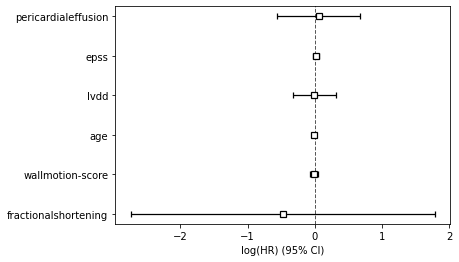

In [63]:
lasso_model.plot()

In [94]:
print("Predictions are \n",lasso_model.predict_expectation(df_dummy))


Predictions are 
 0      9.144647
1      9.144647
2      9.144647
3      9.144647
4      9.144647
5      9.144647
6      9.144647
7      9.144647
8      9.144647
9      9.144647
10     9.144647
11     9.144647
12     8.512663
13     8.512663
14     8.512663
15     8.512663
16     8.512663
17     8.512663
18     8.512663
19     8.512663
20     8.512663
21     8.512663
22     8.512663
23     8.512663
24     9.860721
25     9.860721
26     9.860721
27     9.860721
28     9.860721
29     9.860721
30     9.860721
31     9.860721
32     9.860721
33     9.860721
34     9.860721
35     9.860721
36    10.683940
37    10.683940
38    10.683940
39    10.683940
40    10.683940
41    10.683940
42    10.683940
43    10.683940
44    10.683940
45    10.683940
46    10.683940
47    10.683940
dtype: float64


,Tower Id,Tenure (Month),Service Flag,Age,SNO,Region_Cat
0,1,12,1,10,100000000.0,0


Text(0.5, 1.0, 'Survival function')

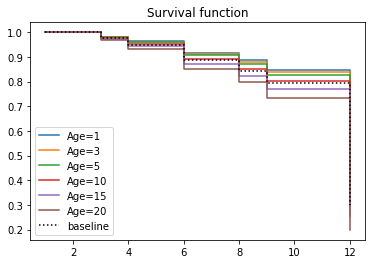

In [90]:
lasso_model.plot_partial_effects_on_outcome('Age',values = [1,3,5,10,15,20])
plt.title('Survival function')